In [1]:
# 导入pandas库，用于数据处理和分析
import pandas as pd
# 导入numpy库，用于科学计算
import numpy as np
# 导入matplotlib库，用于数据可视化
import matplotlib.pyplot as plt
# 导入贝叶斯模型
from sklearn.naive_bayes import GaussianNB
# 导入train_test_split函数，用于划分训练集和测试集
from sklearn.model_selection import train_test_split
# 导入均方误差、平均绝对误差和R2得分函数，用于评估模型性能
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# 加载数据集
data = pd.read_csv('./CarRentalData.csv')

In [3]:
# 检查数据集中的所有列的数据类型
print(data.dtypes)

fuelType               object
rating                float64
renterTripsTaken        int64
reviewCount             int64
location.city          object
location.country       object
location.latitude     float64
location.longitude    float64
location.state         object
owner.id                int64
rate.daily              int64
vehicle.make           object
vehicle.model          object
vehicle.type           object
vehicle.year            int64
dtype: object


In [4]:
# 数据预处理
# 处理缺失值和异常值
data.dropna(inplace=True) # 删除缺失值
data = data[data['rate.daily'] > 0] # 删除异常值
data = data[data['renterTripsTaken'] > 0] # 删除异常值
data = data[data['rating'] > 0] # 删除异常值

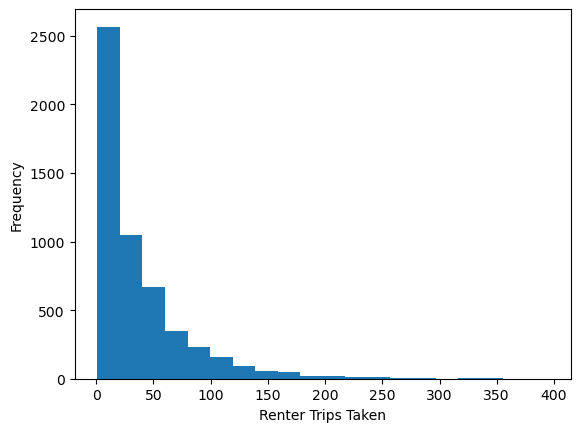

In [5]:
# 租车次数分可视化分析
plt.hist(data['renterTripsTaken'], bins=20) # 绘制直方图
plt.xlabel('Renter Trips Taken') # x轴标签
plt.ylabel('Frequency') # y轴标签
plt.show() # 显示图像


In [6]:
# 将数据集分为特征和目标变量
X = data[['renterTripsTaken', 'vehicle.make', 'rating','reviewCount', 'vehicle.type']] # 特征变量
y = data['rate.daily'] # 目标变量

In [7]:
# 对分类变量进行独热编码
X = pd.get_dummies(X, columns=['vehicle.make', 'vehicle.type'])

In [8]:
# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 划分训练集和测试集

In [9]:
# 使用贝叶斯算法来训练模型
model = GaussianNB()
model.fit(X_train, y_train) # 模型训练

GaussianNB()

In [10]:
# 评估模型的性能
y_pred = model.predict(X_test) # 预测测试集
mse = mean_squared_error(y_test, y_pred) # 均方误差
mae = mean_absolute_error(y_test, y_pred) # 平均绝对误差
r2 = r2_score(y_test, y_pred) # R2得分
print("MSE:", mse) # 打印均方误差
print("MAE:", mae) # 打印平均绝对误差
print("R2 Score:", r2) # 打印R2得分

MSE: 14590.051039697542
MAE: 75.35916824196597
R2 Score: -0.6709255933972122


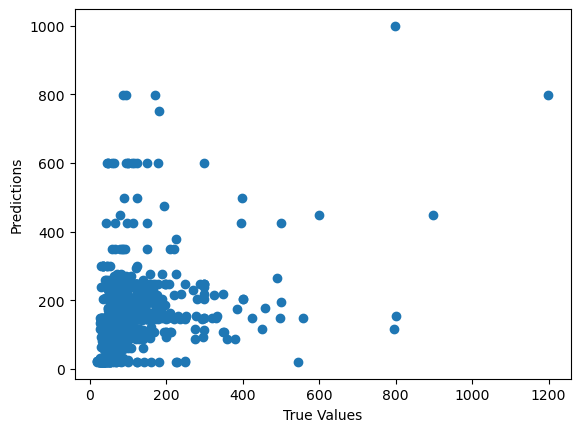

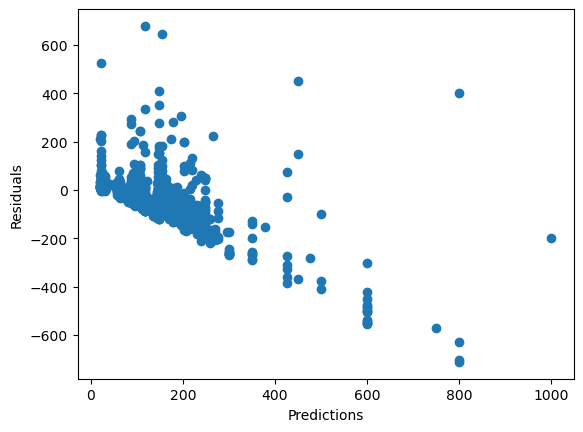

In [11]:
# 数据可视化分析
# 可以使用各种图表来分析模型的性能，例如预测值与真实值的散点图、残差图等
plt.scatter(y_test, y_pred) # 绘制散点图
plt.xlabel('True Values') # x轴标签
plt.ylabel('Predictions') # y轴标签
plt.show() # 显示图像

plt.scatter(y_pred, y_test - y_pred) # 绘制散点图
plt.xlabel('Predictions') # x轴标签
plt.ylabel('Residuals') # y轴标签
plt.show() # 显示图像

In [12]:
# 计算并打印模型的准确率
accuracy = model.score(X_test, y_test) # 计算模型准确率
print("Accuracy:", accuracy) # 打印模型准确率

Accuracy: 0.002835538752362949
